In [1]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D,Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()#split dataset into train and test
X_train.shape,X_test.shape,y_train.shape,y_test.shape

11490434/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [3]:
X_train[0].min(),X_train[0].max()


(0, 255)

In [4]:
#scaled_value = (original_value – min) / (max – min)
X_train = (X_train - 0) / (255 - 0)
X_test = (X_test - 0) / (255 - 0)
X_train[0].min(), X_train[0].max()

(0.0, 1.0)

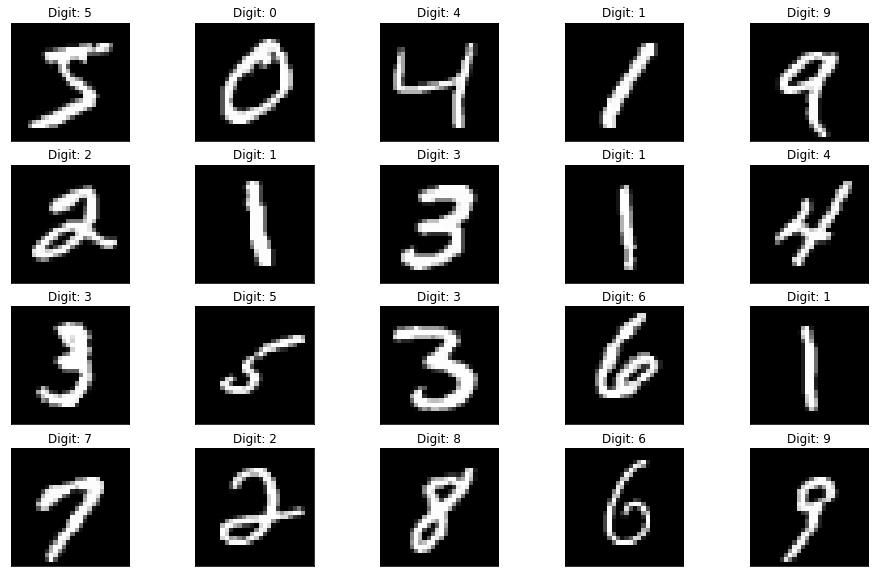

In [5]:
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.title(f"Digit: {digit}")
    plt.xticks([])
    plt.yticks([])


plt.figure(figsize=(16, 10))
for i in range(20):
    plot_digit(X_train[i], y_train[i], plt, i)
    
plt.show()

In [6]:
X_train.shape


(60000, 28, 28)

In [7]:

#reshape() function to reshape all of the data by adding that extra dimension.
X_train = X_train.reshape((X_train.shape + (1,)))
X_test = X_test.reshape((X_test.shape + (1,)))
X_train.shape

(60000, 28, 28, 1)

In [8]:
#let's take a look at the format of our target values (y_train)
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax")
])

In [ ]:
model.compile(
    optimizer='sgd', 
    loss="sparse_categorical_crossentropy", 
    metrics=["accuracy"]
)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 100)               540900    
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks=[EarlyStopping(monitor='val_accuracy',patience=3)]
history=model.fit(X_train, y_train,epochs=5,batch_size=32,validation_split=0.2,callbacks=callbacks)

Epoch 1/5
1500/1500 [==============================] - 29s 19ms/step - loss: 0.2169 - accuracy: 0.9351 - val_loss: 0.1771 - val_accuracy: 0.9513
Epoch 2/5
1500/1500 [==============================] - 29s 19ms/step - loss: 0.1718 - accuracy: 0.9499 - val_loss: 0.1584 - val_accuracy: 0.9546
Epoch 3/5
1500/1500 [==============================] - 29s 19ms/step - loss: 0.1435 - accuracy: 0.9574 - val_loss: 0.1331 - val_accuracy: 0.9619
Epoch 4/5
1500/1500 [==============================] - 29s 19ms/step - loss: 0.1226 - accuracy: 0.9635 - val_loss: 0.1360 - val_accuracy: 0.9596
Epoch 5/5
1500/1500 [==============================] - 30s 20ms/step - loss: 0.1066 - accuracy: 0.9689 - val_loss: 0.1143 - val_accuracy: 0.9667


In [ ]:
predictions = np.argmax(model.predict(X_test), axis=-1)
accuracy_score(y_test, predictions)

313/313 [==============================] - 2s 7ms/step


0.9676

In [ ]:
def define_model():
 model = Sequential()
 model.add(Conv2D(32, (3, 3), activation='selu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
 model.add(MaxPooling2D((2, 2)))
 model.add(Conv2D(64, (3, 3), activation='selu', kernel_initializer='he_uniform'))
 model.add(Conv2D(64, (3, 3), activation='selu', kernel_initializer='he_uniform'))
 model.add(MaxPooling2D((2, 2)))
 model.add(Flatten())
 model.add(Dense(100, activation='selu', kernel_initializer='he_uniform'))
 model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(
    optimizer='adam', 
    loss="sparse_categorical_crossentropy", 
    metrics=["accuracy"])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks=[EarlyStopping(monitor='val_accuracy',patience=3)]
history=model.fit(X_train, y_train,epochs=10,batch_size=20,validation_split=0.2,callbacks=callbacks)

Epoch 1/10
2400/2400 [==============================] - 38s 16ms/step - loss: 0.1216 - accuracy: 0.9634 - val_loss: 0.0697 - val_accuracy: 0.9785
Epoch 2/10
2400/2400 [==============================] - 38s 16ms/step - loss: 0.0499 - accuracy: 0.9849 - val_loss: 0.0507 - val_accuracy: 0.9831
Epoch 3/10
2400/2400 [==============================] - 38s 16ms/step - loss: 0.0298 - accuracy: 0.9908 - val_loss: 0.0515 - val_accuracy: 0.9841
Epoch 4/10
2400/2400 [==============================] - 39s 16ms/step - loss: 0.0177 - accuracy: 0.9940 - val_loss: 0.0504 - val_accuracy: 0.9868
Epoch 5/10
2400/2400 [==============================] - 37s 16ms/step - loss: 0.0123 - accuracy: 0.9962 - val_loss: 0.0563 - val_accuracy: 0.9846
Epoch 6/10
2400/2400 [==============================] - 37s 16ms/step - loss: 0.0094 - accuracy: 0.9969 - val_loss: 0.0652 - val_accuracy: 0.9830
Epoch 7/10
2400/2400 [==============================] - 38s 16ms/step - loss: 0.0075 - accuracy: 0.9977 - val_loss: 0.0764 -

In [ ]:
predictions = np.argmax(model.predict(X_test), axis=-1)
accuracy_score(y_test, predictions)

313/313 [==============================] - 2s 7ms/step


0.9847

In [10]:

#####Traditional cnn
model= Sequential([
    Conv2D (32, (5, 5), activation = "relu", input_shape=(28,28,1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax"),
])

In [11]:
model.compile(
    optimizer="sgd",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

In [13]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 34s 22ms/step - loss: 0.3469 - accuracy: 0.8987 - val_loss: 0.2350 - val_accuracy: 0.9334
Epoch 2/5
1500/1500 [==============================] - 32s 21ms/step - loss: 0.2219 - accuracy: 0.9344 - val_loss: 0.1766 - val_accuracy: 0.9500
Epoch 3/5
1500/1500 [==============================] - 33s 22ms/step - loss: 0.1619 - accuracy: 0.9513 - val_loss: 0.1571 - val_accuracy: 0.9538
Epoch 4/5
1500/1500 [==============================] - 36s 24ms/step - loss: 0.1267 - accuracy: 0.9618 - val_loss: 0.1118 - val_accuracy: 0.9682
Epoch 5/5
1500/1500 [==============================] - 34s 23ms/step - loss: 0.1032 - accuracy: 0.9695 - val_loss: 0.0942 - val_accuracy: 0.9734


In [14]:
predictions = np.argmax(model.predict(X_test), axis=-1)
accuracy_score(y_test, predictions)

313/313 [==============================] - 2s 7ms/step


0.9729

In [15]:
model= Sequential([
    Conv2D (64, (5, 5), activation = "selu", input_shape=(28,28,1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation="selu"),
    Dense(10, activation="softmax"),
])

In [16]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

In [17]:
history = model.fit(X_train, y_train, epochs=10, batch_size=20, validation_split=0.2)

Epoch 1/10
2400/2400 [==============================] - 71s 29ms/step - loss: 0.2010 - accuracy: 0.9401 - val_loss: 0.0905 - val_accuracy: 0.9732
Epoch 2/10
2400/2400 [==============================] - 71s 30ms/step - loss: 0.0760 - accuracy: 0.9768 - val_loss: 0.0876 - val_accuracy: 0.9747
Epoch 3/10
2400/2400 [==============================] - 70s 29ms/step - loss: 0.0486 - accuracy: 0.9843 - val_loss: 0.1036 - val_accuracy: 0.9726
Epoch 4/10
2400/2400 [==============================] - 70s 29ms/step - loss: 0.0361 - accuracy: 0.9885 - val_loss: 0.0861 - val_accuracy: 0.9794
Epoch 5/10
2400/2400 [==============================] - 69s 29ms/step - loss: 0.0293 - accuracy: 0.9905 - val_loss: 0.0948 - val_accuracy: 0.9800
Epoch 6/10
2400/2400 [==============================] - 72s 30ms/step - loss: 0.0280 - accuracy: 0.9916 - val_loss: 0.1119 - val_accuracy: 0.9774
Epoch 7/10
2400/2400 [==============================] - 73s 30ms/step - loss: 0.0209 - accuracy: 0.9935 - val_loss: 0.1136 -

In [18]:
predictions = np.argmax(model.predict(X_test), axis=-1)
accuracy_score(y_test, predictions)

313/313 [==============================] - 4s 13ms/step


0.9772